In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.DATA PREPERATION

In [2]:
df=pd.read_csv("CreditDetails-train.csv", header=0, index_col=0)

In [3]:
df.shape

(3790, 13)

In [4]:
df.head()

,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
id,,,,,,,,,,,,,
1,0,2871,6/2/1911,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
2,0,2872,NaN,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
3,0,2873,6/4/1908,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
4,0,2874,NaN,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
5,0,2875,NaN,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25


In [5]:
#Understanding the meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 1 to 3790
Data columns (total 13 columns):
headquarter              3790 non-null int64
location.Code            3790 non-null int64
date_of_establishment    1750 non-null object
location                 3790 non-null object
loc.details              3790 non-null object
state                    3790 non-null object
deposit_amount_2011      3050 non-null float64
deposit_amount_2012      3212 non-null float64
deposit_amount_2013      3461 non-null float64
deposit_amount_2014      3615 non-null float64
deposit_amount_2015      3734 non-null float64
deposit_amount_2016      3771 non-null float64
deposit_amount_2017      3771 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 414.5+ KB


In [6]:
#Understanding the numeric data
df.describe()

,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
count,3790.0,3790.000000,3.050000e+03,3.212000e+03,3.461000e+03,3.615000e+03,3.734000e+03,3.771000e+03,3.771000e+03
mean,0.0,5395.806332,1.683201e+05,1.882705e+05,1.933803e+05,2.045743e+05,2.183874e+05,2.364422e+05,3.546633e+05
std,0.0,1549.105135,4.196386e+06,5.171073e+06,5.320718e+06,5.610536e+06,5.970416e+06,6.422120e+06,9.633180e+06
min,0.0,2871.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,4067.250000,2.839800e+04,3.019912e+04,3.159750e+04,3.497175e+04,3.935850e+04,4.632150e+04,6.948225e+04
50%,0.0,5261.500000,5.344200e+04,5.577450e+04,5.961600e+04,6.353700e+04,7.015800e+04,7.877400e+04,1.181610e+05
75%,0.0,6863.250000,9.910912e+04,1.004205e+05,1.072440e+05,1.145288e+05,1.249448e+05,1.373490e+05,2.060235e+05
max,0.0,7994.000000,2.303660e+08,2.915820e+08,3.110520e+08,3.350930e+08,3.623109e+08,3.919391e+08,5.879087e+08


# PRE-PROCESSING THE DATA

In [7]:
#1.FEATURE SELECTION

In [8]:
#CHECKING THE VALUE COUNT OF THE VARIABLES FOR BETTER UNDERSTANDING
'''for x in df.columns:
    print(x)
    print(df[x].value_counts())'''
df["headquarter"].value_counts()

0    3790
Name: headquarter, dtype: int64

In [9]:
'''HERE WE SEE THAT HEADQUARTER HAS THE SAME VALUE FOR ALL THE OBSERVATIONS THUS DOESN'T CONTRIBUTE TO THE DATA.
DROPPING HEADQUARTER.'''

"HERE WE SEE THAT HEADQUARTER HAS THE SAME VALUE FOR ALL THE OBSERVATIONS THUS DOESN'T CONTRIBUTE TO THE DATA.\nDROPPING HEADQUARTER."

In [10]:
df=df.drop(["headquarter"],axis=1)
df.shape

(3790, 12)

In [11]:
df["location.Code"].value_counts()

4094    1
2884    1
2900    1
4947    1
6994    1
2896    1
4943    1
6990    1
2892    1
4939    1
6986    1
2888    1
4935    1
6982    1
4931    1
4951    1
6978    1
2880    1
4927    1
6974    1
2876    1
4923    1
6970    1
2872    1
4919    1
4911    1
6958    1
4907    1
6998    1
2904    1
6802    1
7022    1
4991    1
2940    1
4987    1
7034    1
2936    1
4983    1
7030    1
2932    1
4979    1
7026    1
2928    1
4975    1
2924    1
7002    1
4971    1
7018    1
2920    1
4967    1
7014    1
2916    1
4963    1
7010    1
2912    1
4959    1
2908    1
4955    1
4903    1
4899    1
4895    1
6834    1
4819    1
6866    1
4815    1
4811    1
4807    1
6854    1
4803    1
4799    1
4795    1
6842    1
6838    1
4787    1
4783    1
4891    1
6830    1
6826    1
4775    1
6822    1
4771    1
6818    1
4767    1
6814    1
4763    1
6810    1
4759    1
6806    1
6870    1
4823    1
6874    1
4827    1
6938    1
4887    1
6934    1
4883    1
4879    1
6926    1
6918    1
4867    1


In [12]:
df["location"].value_counts()

Chicago                   99
New York City             76
Houston                   72
Los Angeles               58
Indianapolis              49
Miami                     44
San Francisco             42
Brooklyn                  40
Seattle                   36
San Diego                 35
Las Vegas                 34
San Antonio               32
Dallas                    31
San Jose                  28
Louisville                27
Portland                  24
Orlando                   21
Austin                    19
Sacramento                17
Bronx                     17
Denver                    17
Lexington                 16
Atlanta                   16
Fort Worth                16
Phoenix                   16
Tampa                     16
Irvine                    15
Vancouver                 13
Scottsdale                13
Naples                    13
Fort Wayne                12
Aurora                    12
Bakersfield               12
Lakewood                  12
Jacksonville  

In [13]:
df["loc.details"].value_counts()

Los Angeles             298
Cook                    159
Orange                  149
Harris                  102
San Diego                92
Maricopa                 90
King                     86
Miami-Dade               82
New York                 76
Clark                    71
Nassau                   63
Marion                   61
Westchester              60
Suffolk                  59
Santa Clara              57
Palm Beach               54
Broward                  50
Jefferson                49
Dallas                   47
Queens                   46
Riverside                45
Lake                     44
San Francisco            42
Bergen                   42
Kings                    41
San Bernardino           39
Tarrant                  38
Alameda                  38
Bexar                    35
Contra Costa             33
Sacramento               31
Ventura                  30
Collin                   29
Hillsborough             25
Snohomish                25
Multnomah           

In [14]:
df["state"].value_counts()

CA    1003
NY     425
FL     391
TX     378
IL     252
WA     204
NJ     179
IN     177
CO     114
OR     113
AZ     112
GA      83
WI      61
KY      56
NV      48
MI      38
OH      33
UT      32
OK      32
CT      22
ID      20
LA      14
MA       1
DC       1
PA       1
Name: state, dtype: int64

In [15]:
df["deposit_amount_2011"].value_counts()

0.0            47
25234.5         3
46299.0         2
9663.0          2
10548.0         2
40938.0         2
179181.0        2
49932.0         2
68578.5         2
65908.5         2
58668.0         2
115644.0        2
48435.0         2
53862.0         2
49563.0         2
49080.0         2
32310.0         2
55513.5         2
28243.5         2
20616.0         2
23317.5         2
10650.0         2
113895.0        2
90967.5         2
67732.5         2
25044.0         2
19254.0         2
51285.0         2
27954.0         2
60954.0         2
97036.5         2
58708.5         2
130573.5        2
67369.5         2
63652.5         2
49332.0         2
52660.5         2
31378.5         2
36624.0         2
89215.5         2
25038.0         2
95158.5         2
35359.5         2
20044.5         2
20286.0         2
60318.0         2
17301.0         2
34882.5         2
74502.0         2
18426.0         1
37461.0         1
68637.0         1
170323.5        1
293655.0        1
49849.5         1
40836.0   

In [16]:
df["deposit_amount_2012"].value_counts()

0.0            45
30319.5         3
68905.5         3
27394.5         2
32917.5         2
44734.5         2
24861.0         2
91375.5         2
10546.5         2
8677.5          2
59974.5         2
98661.0         2
23964.0         2
35827.5         2
35901.0         2
53913.0         2
51451.5         2
42465.0         2
22938.0         2
34336.5         2
24213.0         2
22470.0         2
25483.5         2
35335.5         2
29109.0         2
39543.0         2
33492.0         2
66894.0         2
10060.5         2
15222.0         2
35506.5         2
43764.0         2
40345.5         2
33514.5         2
31609.5         2
52516.5         2
62038.5         2
25035.0         2
43002.0         2
16660.5         2
113781.0        2
39016.5         2
27474.0         2
75295.5         2
83973.0         2
20382.0         2
4255.5          2
10855.5         2
161722.5        2
54223.5         2
12310.5         2
23212.5         2
95446.5         2
60774.0         2
24457.5         2
131637.0  

In [17]:
df["deposit_amount_2013"].value_counts()

0.0            49
40392.0         2
47707.5         2
87961.5         2
31801.5         2
28990.5         2
40207.5         2
31896.0         2
107469.0        2
77232.0         2
42795.0         2
67803.0         2
4477.5          2
62122.5         2
17676.0         2
50184.0         2
30180.0         2
74790.0         2
25063.5         2
30733.5         2
8484.0          2
61423.5         2
29865.0         2
24054.0         2
36438.0         2
9117.0          2
46966.5         2
82191.0         2
14911.5         2
147967.5        2
43648.5         2
29229.0         2
80827.5         2
76456.5         2
62671.5         2
31689.0         2
90526.5         2
37237.5         2
113886.0        2
66273.0         2
55330.5         2
142150.5        2
44211.0         2
58441.5         2
87810.0         2
59616.0         2
17497.5         2
156858.0        2
46464.0         2
18004.5         2
33370.5         2
50983.5         2
54720.0         2
59868.0         2
72016.5         2
69766.5   

In [18]:
df["deposit_amount_2014"].value_counts()

0.0            50
52413.0         3
51912.0         3
77794.5         2
69052.5         2
25266.0         2
104863.5        2
31773.0         2
20734.5         2
105906.0        2
81633.0         2
46066.5         2
24723.0         2
121503.0        2
44772.0         2
11460.0         2
58995.0         2
23200.5         2
140398.5        2
84832.5         2
25360.5         2
11247.0         2
68742.0         2
41197.5         2
127521.0        2
68221.5         2
49737.0         2
44946.0         2
71982.0         2
83725.5         2
24121.5         2
51610.5         2
62781.0         2
37365.0         2
62746.5         2
29955.0         2
24778.5         2
45939.0         2
48213.0         2
26845.5         2
43020.0         2
51049.5         2
96766.5         2
37921.5         2
28863.0         2
78013.5         2
85965.0         2
71521.5         2
92337.0         2
17329.5         2
68472.0         2
56290.5         2
35607.0         2
27978.0         2
45336.0         2
63484.5   

In [19]:
df["deposit_amount_2015"].value_counts()

0.0            51
150987.0        2
44452.5         2
63385.5         2
40044.0         2
64131.0         2
46803.0         2
8505.0          2
25114.5         2
49062.0         2
61992.0         2
34950.0         2
11340.0         2
70731.0         2
66282.0         2
15379.5         2
29923.5         2
87582.0         2
46777.5         2
21676.5         2
160020.0        2
105760.5        2
21894.0         2
73614.0         2
84859.5         2
23154.0         2
72429.0         2
57706.5         2
52257.0         2
63376.5         2
102274.5        2
84201.0         2
22747.5         2
111298.5        2
76726.5         2
53700.0         2
96843.0         2
45903.0         2
146712.0        2
95773.5         2
36688.5         2
68908.5         2
142119.0        2
175815.0        1
19425.0         1
80218.5         1
33306.0         1
316779.0        1
97627.5         1
99676.5         1
35145.0         1
58897.5         1
36522.0         1
22075.5         1
189097.5        1
3231.0    

In [20]:
df["deposit_amount_2016"].value_counts()

0.0            50
28245.0         2
109528.5        2
35719.5         2
32496.0         2
86626.5         2
34861.5         2
76015.5         2
43893.0         2
110755.5        2
21331.5         2
50931.0         2
63586.5         2
46968.0         2
66687.0         2
112305.0        2
25789.5         2
66846.0         2
101235.0        2
41106.0         2
139911.0        2
58555.5         2
46363.5         2
80713.5         2
91843.5         2
48484.5         2
44214.0         2
156318.0        2
96706.5         2
22927.5         2
115275.0        2
72898.5         2
66612.0         2
102592.5        2
33325.5         2
49864.5         2
100297.5        2
49834.5         2
56212.5         2
38338.5         2
35647.5         2
65875.5         2
75835.5         2
85923.0         2
31302.0         2
43650.0         2
160297.5        2
77362.5         2
54922.5         2
46591.5         2
41721.0         2
28587.0         1
58284.0         1
439693.5        1
62305.5         1
85347.0   

In [21]:
df["deposit_amount_2017"].value_counts()

0.000000e+00    50
1.002690e+05     2
2.098665e+05     2
2.344770e+05     2
9.881325e+04     2
3.868425e+04     2
9.991800e+04     2
7.639650e+04     2
4.998825e+04     2
5.357925e+04     2
1.000305e+05     2
4.695300e+04     2
4.236750e+04     2
6.632100e+04     2
8.783325e+04     2
6.258150e+04     2
7.045200e+04     2
6.165900e+04     2
1.450598e+05     2
1.288845e+05     2
6.547500e+04     2
1.299398e+05     2
1.093478e+05     2
1.504462e+05     2
8.238375e+04     2
5.347125e+04     2
1.642928e+05     2
7.272675e+04     2
7.479675e+04     2
1.137532e+05     2
1.661332e+05     2
5.229225e+04     2
1.538888e+05     2
9.537975e+04     2
1.518525e+05     2
4.874400e+04     2
1.210702e+05     2
1.729125e+05     2
6.988725e+04     2
1.684575e+05     2
1.377652e+05     2
5.750775e+04     2
1.160438e+05     2
8.431875e+04     2
1.140232e+05     2
3.439125e+04     2
2.404462e+05     2
6.954525e+04     2
7.475175e+04     2
3.199725e+04     2
6.583950e+04     2
1.476450e+04     1
1.392750e+04

In [22]:
'''IN ALL THE DEPOSIT VARIABLES THERE IS 0 WHICH NEEDS TO BE REPLACED WITH NAN'''

'IN ALL THE DEPOSIT VARIABLES THERE IS 0 WHICH NEEDS TO BE REPLACED WITH NAN'

In [23]:
df.shape

(3790, 12)

In [24]:
#REPLACING THE 0 WITH NAN
df=df.replace([0],np.nan)

In [25]:
#2.CHECKING FOR MISSING VALUES
df.isnull().sum()

location.Code               0
date_of_establishment    2040
location                    0
loc.details                 0
state                       0
deposit_amount_2011       787
deposit_amount_2012       623
deposit_amount_2013       378
deposit_amount_2014       225
deposit_amount_2015       107
deposit_amount_2016        69
deposit_amount_2017        69
dtype: int64

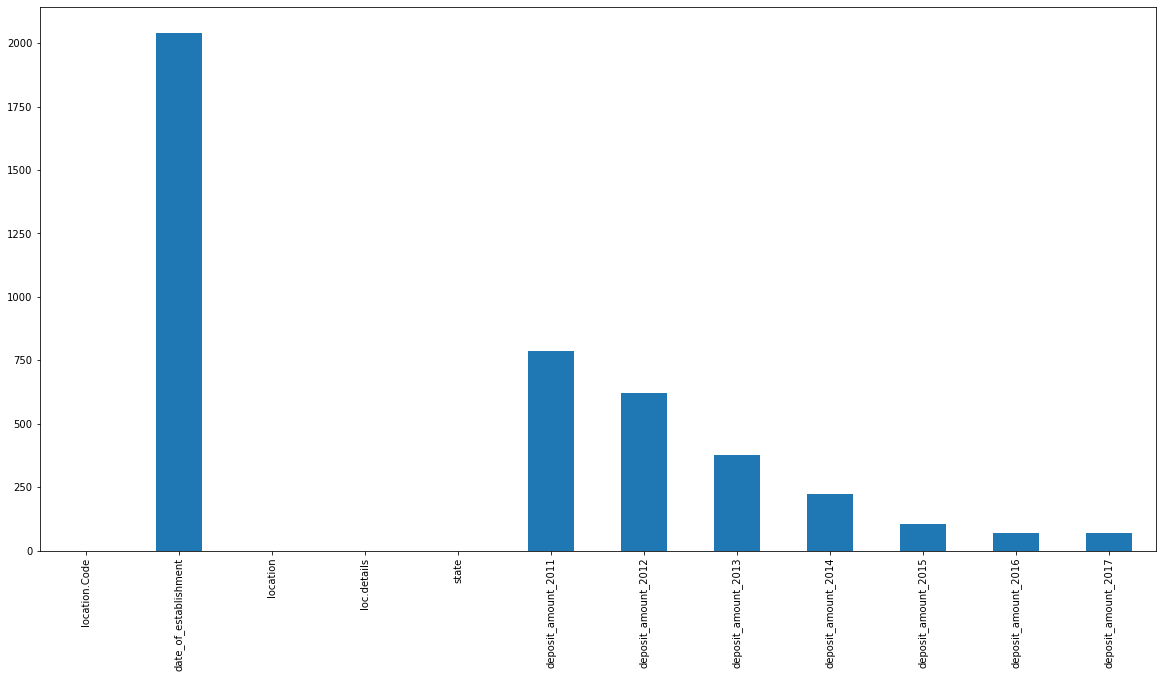

In [26]:
#PLOTTING THE DRAPH FOR MISSING VALUES IN THE DATA
cols = df.isnull().sum()
plt.figure(figsize=(20,10))
cols.plot(kind='bar')
plt.show()

In [27]:
#ELIMINATING THE VARIABLES THAT HAVE MORE THAN 50% NA'S
null_cols=[]
for x in df.columns:
    if df[x].isnull().sum()>=0.5*len(df):
        null_cols.append(x)
print(null_cols)

['date_of_establishment']


In [28]:
'''
date_of_establishment - date of when the bank was established has more than 50% null values, 
also doesn't seem to contribute to the data so will be eliminated. 
'''

"\ndate_of_establishment - date of when the bank was established has more than 50% null values, \nalso doesn't seem to contribute to the data so will be eliminated. \n"

In [29]:
df=df.drop(["date_of_establishment"],axis=1)

In [30]:
df.shape

(3790, 11)

In [31]:
df.isnull().sum()

location.Code            0
location                 0
loc.details              0
state                    0
deposit_amount_2011    787
deposit_amount_2012    623
deposit_amount_2013    378
deposit_amount_2014    225
deposit_amount_2015    107
deposit_amount_2016     69
deposit_amount_2017     69
dtype: int64

In [32]:
#DROPPING THE OBS IN WHICH ALL THE DEPOSIT VARIABLES CONTAIN A MISSING VALUE
df=df.dropna(how="all",subset=["deposit_amount_2011","deposit_amount_2012","deposit_amount_2013",
                              "deposit_amount_2014","deposit_amount_2015","deposit_amount_2016",
                              "deposit_amount_2017"])
df.shape

(3724, 11)

In [33]:
'''HERE WE SEE 66 SUCH OBS (ROWS) HAVE BEEN DELETED FROM THE DATA'''

'HERE WE SEE 66 SUCH OBS (ROWS) HAVE BEEN DELETED FROM THE DATA'

In [34]:
df.isnull().sum()

location.Code            0
location                 0
loc.details              0
state                    0
deposit_amount_2011    721
deposit_amount_2012    557
deposit_amount_2013    312
deposit_amount_2014    159
deposit_amount_2015     41
deposit_amount_2016      3
deposit_amount_2017      3
dtype: int64

In [35]:
#IMPUTING THE MISSING VALUES WITH THE MEAN
for x in df.columns[:]:
    if df[x].dtype=='object':
        df[x].fillna(df[x].mode()[0],inplace=True)
    elif df[x].dtype=='int64' or df[x].dtype=='float64':
        df[x].fillna(df[x].mean(),inplace=True)

In [36]:
'''#RELACING NA'S WITH 0
df=df.replace([np.nan],0)'''

"#RELACING NA'S WITH 0\ndf=df.replace([np.nan],0)"

In [37]:
df.isnull().sum()

location.Code          0
location               0
loc.details            0
state                  0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
deposit_amount_2017    0
dtype: int64

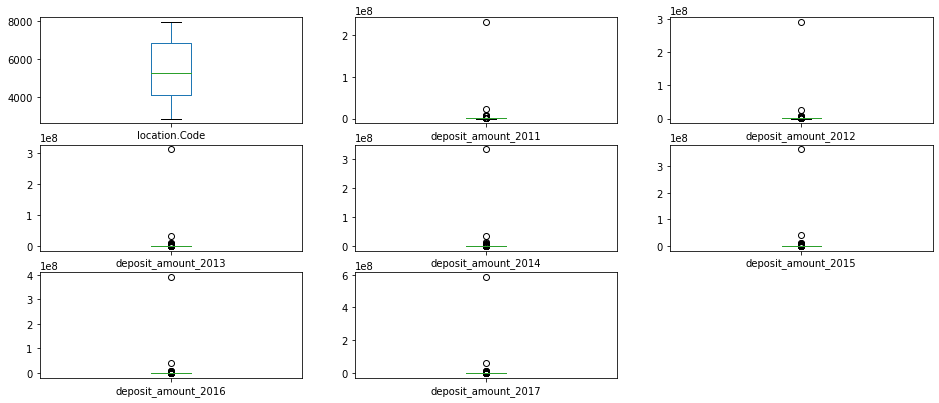

In [38]:
#OUTLIER IMPUTATION
df.plot(kind='box', subplots=True, layout=(7,3), sharex=False, sharey=False, figsize=(16,16) )
plt.show()


In [39]:
#CONVERTING CATEGORICAL VARIABLES TO NUMERIC
#collecting the categorical variables to perform transformation
char_vars=[]
for i in df.columns:
    if df[i].dtype=="object":
        char_vars.append(i)
print(char_vars)

['location', 'loc.details', 'state']


In [40]:
#converting the categorical variables into numeric variables using LabelEncoder()
from sklearn import preprocessing
#create an object
le=preprocessing.LabelEncoder()

#it executes fit on the actual data and populates  "le"  in form of key value pair and then performs transform 
for x in char_vars:
    df[x]=le.fit_transform(df[x])    


In [41]:
df.dtypes

location.Code            int64
location                 int32
loc.details              int32
state                    int32
deposit_amount_2011    float64
deposit_amount_2012    float64
deposit_amount_2013    float64
deposit_amount_2014    float64
deposit_amount_2015    float64
deposit_amount_2016    float64
deposit_amount_2017    float64
dtype: object

In [42]:
#CREATING X & Y
X=df.values[:,:-1] #.values ends up creating a array
Y=df.values[:,-1]

In [43]:
#SCALING THE DATA SET
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[-1.64413478  1.5735363   1.66850665 ... -0.03023004 -0.02934135
  -0.0299615 ]
 [-1.6434849  -0.6557497   1.64261737 ... -0.01757897 -0.01662481
  -0.01636039]
 [-1.64283502 -1.40446239  1.66850665 ... -0.00336249 -0.00379084
  -0.00519605]
 ...
 [ 1.66765929  0.4588933  -0.89453247 ...  0.          0.
  -0.03699095]
 [ 1.66830917 -0.78334383 -1.3993735  ...  0.          0.
  -0.03640711]
 [ 1.66895906 -1.45020368  0.06337104 ...  0.          0.
  -0.03465399]]


In [44]:
#CONVERTING Y INTO AN INTEGER
Y=Y.astype(int)

In [45]:
#SPLITTING THE DATA INTO TRAIN & TEST
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=10)

# DECISION TREE REGRESSOR

In [46]:
from sklearn.tree import DecisionTreeRegressor
#Create the model object
model_DT=DecisionTreeRegressor(max_depth=20,random_state=10,max_leaf_nodes=50)
#Train the model
model_DT.fit(X_train,Y_train)
#Prediction
Y_pred=model_DT.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(195212, 205916.88392857142), (92844, 89421.23008849558), (206651, 205916.88392857142), (129226, 132069.84545454546), (426782, 427149.75757575757), (61877, 63064.23931623931), (184547, 184260.0082644628), (32188, 36038.69565217391), (99693, 97842.81196581197), (224849, 226492.67857142858), (226791, 226492.67857142858), (98727, 97842.81196581197), (99011, 97842.81196581197), (183791, 184260.0082644628), (178474, 184260.0082644628), (86267, 89421.23008849558), (57631, 54727.328), (102249, 110154.16336633664), (78250, 75937.37668161435), (144263, 141926.1625), (286812, 280763.67391304346), (236333, 226492.67857142858), (170921, 165762.75806451612), (41760, 46001.779527559054), (184074, 184260.0082644628), (291726, 301712.04347826086), (62581, 63064.23931623931), (185647, 184260.0082644628), (77519, 75937.37668161435), (542175, 534975.7692307692), (93453, 89421.23008849558), (417008, 427149.75757575757), (273424, 266193.6170212766), (98196, 97842.81196581197), (512583, 500197.2380952381),

In [47]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8876094663938617
72595.76333407992
0.8873067717167646


# RANDOM FOREST REGRESSOR

In [48]:
from sklearn.ensemble import RandomForestRegressor
 
#create the model object
model_RandomForest=RandomForestRegressor(n_estimators=2000,random_state=10)
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
#predict 
Y_pred=model_RandomForest.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(195212, 195294.285), (92844, 92795.6075), (206651, 206810.722), (129226, 129188.2), (426782, 426657.6215), (61877, 61853.573), (184547, 184557.0795), (32188, 32226.483), (99693, 99703.289), (224849, 225174.476), (226791, 227121.441), (98727, 98751.0325), (99011, 99078.938), (183791, 183666.275), (178474, 178533.052), (86267, 86276.695), (57631, 57605.787), (102249, 102369.064), (78250, 78224.673), (144263, 144199.6695), (286812, 286082.4395), (236333, 236357.9315), (170921, 171013.959), (41760, 41773.801), (184074, 183966.349), (291726, 291810.744), (62581, 62576.983), (185647, 185438.712), (77519, 77452.8845), (542175, 543468.382), (93453, 93486.292), (417008, 417462.1725), (273424, 273946.46), (98196, 98216.4855), (512583, 513579.4075), (120991, 121004.664), (155072, 155290.512), (174973, 175120.4465), (105531, 105556.6805), (80561, 80433.5735), (190190, 190254.6825), (166761, 166737.6285), (61659, 61648.955), (45578, 45599.2725), (60365, 60204.6515), (66357, 66347.786), (49491, 49

In [49]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9984562554860927
8508.13011952594
0.998452097811668


# EXTRA TREES REGRESSOR

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
#create a model object 
model=ExtraTreesRegressor(100,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
#predict
Y_pred=model.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(195212, 195076.44), (92844, 92844.63), (206651, 206832.64), (129226, 129723.07), (426782, 426274.95), (61877, 61878.62), (184547, 184507.74), (32188, 32071.42), (99693, 99641.19), (224849, 224994.33), (226791, 226805.13), (98727, 98621.22), (99011, 98964.82), (183791, 183828.96), (178474, 178498.14), (86267, 86353.51), (57631, 57583.65), (102249, 102221.18), (78250, 78194.19), (144263, 144001.67), (286812, 286524.0), (236333, 236605.26), (170921, 171352.34), (41760, 41725.8), (184074, 183889.47), (291726, 291961.8), (62581, 62624.22), (185647, 185609.47), (77519, 77394.7), (542175, 542845.8), (93453, 93460.24), (417008, 415518.11), (273424, 273577.29), (98196, 98259.96), (512583, 509186.71), (120991, 121032.52), (155072, 155064.54), (174973, 175029.39), (105531, 105311.65), (80561, 83764.64), (190190, 190278.14), (166761, 166635.51), (61659, 61634.75), (45578, 45571.33), (60365, 60199.79), (66357, 66418.28), (49491, 49470.7), (124776, 124816.4), (131980, 132061.01), (63396, 63131.71)

In [51]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9665132623610094
39626.236696652835
0.9664230745408129


# STOCASTIC GRADIENT DESCENT

In [52]:
#Model Building
from sklearn.linear_model import SGDRegressor

#1.creating a model object
lm=SGDRegressor(learning_rate="constant", eta0=0.0001, random_state=10, max_iter=12000)
#learning_rate="optimal"-->decides eta0 on its own or alpha
#max_iter-->is a trial & error baesd on the no of epochs you wanna perform

#2.training the model
lm.fit(X_train, Y_train)

#3.predicting--->print the intercepts & coefficients
print(lm.intercept_)
print(lm.coef_)

[194651.51814443]
[   34116.21785567   -15679.60081355   -19049.19739453   -59810.84030736
 -2569535.63354118 -2567559.65710506 -2575442.99116186 -2572139.94117192
 -2573543.02700592 -2573058.89710497]


In [53]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9665132623610094
39626.236696652835
0.9664230745408129


In [54]:
#print(list(zip(df.columns,model_DT.feature_importances_)))

# ADABOOST REGRESSOR

In [55]:
#MODEL BUILDING USING ADABOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor
 
model_AdaBoost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                  n_estimators=100, #default n_estimators=50
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [56]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9643636457448211
40878.32040454452
0.9642676684912387


# GRADIENT BOOSTING REGRESSOR

In [57]:
#MODEL BUILDING USING GRADIENT BOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
 
model_GradientBoosting=GradientBoostingRegressor(n_estimators=270, #default n_estimators=100
                                                  random_state=10)
 
#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)
 
Y_pred=model_GradientBoosting.predict(X_test)

In [58]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9959150477649729
13840.12144280975
0.9959040460083474


In [59]:
#pip install xgboost

In [60]:
#MODEL BUILDING USING XGBOOST REGRESSOR

from xgboost import XGBRegressor
model_XGB = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.09,                                                                  
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=10)
model_XGB.fit(X_train,Y_train)
Y_pred=model_XGB.predict(X_test)

In [61]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9843628557072048
27078.532936762138
0.9843207411252151


# SVM REGRESSOR

In [62]:
#MODEL BUILDING USING SVM REGRESSOR
from sklearn import svm
svc_model=svm.SVR(kernel="rbf", C=1.0, gamma=0.1)
svc_model.fit(X_train,Y_train)     
Y_pred=svc_model.predict(X_test)   
print(list(Y_pred))

[122046.92704574985, 121950.99627678473, 122087.00540975353, 122088.99062978635, 122010.91069319319, 121855.80344641564, 122015.56993295359, 121896.06327943955, 122065.09117629174, 122068.67681475982, 121961.78904844321, 121958.09733241418, 121934.6869790987, 122009.52175560889, 122084.60510142717, 121940.08252716862, 121996.6930965567, 122145.46226007816, 122047.15175212437, 121884.86825578097, 122085.98752679767, 122064.46964795643, 122023.66571781604, 121855.01539251472, 122049.44721392509, 122009.51374227575, 121870.37500182976, 121907.76157799533, 122141.94878888567, 122104.17631250313, 121947.71708341727, 122054.9803197433, 122058.93403994174, 121883.85720299202, 122059.06192873999, 122069.64239128948, 121891.298506646, 122054.2713511684, 121913.06940175492, 122122.25572785128, 122061.01430709942, 122086.5123146508, 122051.89421228797, 121926.29673285865, 121942.45630866439, 122054.66343050267, 121888.71255843372, 122082.63020857945, 122034.01884305579, 121942.86093597341, 121881

In [63]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

-0.04956271823669667
221845.49164402238
-0.052389442498039784


# IMPLEMENTING THE MODEL ON TEST DATA

In [64]:
#READING THE TEST DATA
test_df=pd.read_csv("CreditDetails-test.csv", header=0, index_col=0)

In [65]:
test_df.shape

(1623, 12)

In [66]:
test_df.head()

,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016
id,,,,,,,,,,,,
1,1,5,1824-12-31,Columbus,Delaware,OH,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09
2,0,7,NaN,Scarsdale,Westchester,NY,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05
3,0,8,9/8/1964,Great Neck,Nassau,NY,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05
4,0,9,NaN,Hartsdale,Westchester,NY,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05
5,0,10,NaN,Lawrence,Nassau,NY,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05


In [67]:
#Understanding the metadata
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 1 to 1623
Data columns (total 12 columns):
headquarter              1623 non-null int64
location.Code            1623 non-null int64
date_of_establishment    809 non-null object
location                 1623 non-null object
loc.details              1623 non-null object
state                    1623 non-null object
deposit_amount_2011      1623 non-null float64
deposit_amount_2012      1623 non-null float64
deposit_amount_2013      1623 non-null float64
deposit_amount_2014      1623 non-null float64
deposit_amount_2015      1623 non-null float64
deposit_amount_2016      1623 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 164.8+ KB


In [68]:
#Understanding the numeric data
test_df.describe()

,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016
count,1623.000000,1623.000000,1.623000e+03,1.623000e+03,1.623000e+03,1.623000e+03,1.623000e+03,1.623000e+03
mean,0.000616,1770.314849,8.362408e+05,9.847530e+05,1.107470e+06,1.220473e+06,1.388776e+06,1.412398e+06
std,0.024822,751.636198,2.366439e+07,2.782220e+07,3.120362e+07,3.435485e+07,3.877610e+07,4.003773e+07
min,0.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1333.000000,5.078475e+04,5.330325e+04,5.722350e+04,6.181875e+04,6.461850e+04,6.957150e+04
50%,0.000000,1834.000000,9.857850e+04,1.034700e+05,1.123020e+05,1.204455e+05,1.271415e+05,1.343310e+05
75%,0.000000,2391.500000,1.813568e+05,1.938952e+05,2.072040e+05,2.263215e+05,2.387212e+05,2.584852e+05
max,1.000000,2870.000000,9.496965e+08,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09


# PRE-PROCESSING THE TEST DATA

In [69]:
#1.FEATURE SELECTION
'''DROPPING HEADQUARTER & DATE OF ESTABLISHMENT SINCE IT DOES NOT INCLUDE IN THE TRAINING DATA'''
test_df=test_df.drop(["headquarter","date_of_establishment"],axis=1)
test_df.shape

(1623, 10)

In [70]:
#2.HANDLING THE MISSING VALUES
test_df.isnull().sum()

location.Code          0
location               0
loc.details            0
state                  0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
dtype: int64

In [71]:
#CONVERTING THE CATEGORICAL VARIABLE TO NUMERIC VARIABLES-->using label encoder
char_col=[]
for x in test_df.columns:
    if test_df[x].dtype=='object':
        char_col.append(x)
        
char_col 

['location', 'loc.details', 'state']

In [72]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#it executes fit on the actual data and populates  "le"  in form of key value pair and then performs transform 
for x in char_col:
    test_df[x]=le.fit_transform(test_df[x])

In [73]:
test_df.dtypes

location.Code            int64
location                 int32
loc.details              int32
state                    int32
deposit_amount_2011    float64
deposit_amount_2012    float64
deposit_amount_2013    float64
deposit_amount_2014    float64
deposit_amount_2015    float64
deposit_amount_2016    float64
dtype: object

In [74]:
#CREATING X_NEW & Y_NEW
X_new=test_df.values[:,:]

In [75]:
#SCALING THE DATA
X_new=scaler.transform(X_new)
print(X_new)

[[-3.50669401e+00 -1.43094419e+00 -1.45115207e+00 ...  2.48707588e+02
   2.59068802e+02  2.48219785e+02]
 [-3.50539425e+00 -4.27043255e-01  3.48153169e-01 ...  5.14658010e-02
   4.52151059e-02  4.21866114e-02]
 [-3.50474437e+00 -1.15890389e+00 -5.19137847e-01 ...  2.70546415e-02
   2.17250450e-02  2.38428680e-02]
 ...
 [-1.64608443e+00 -8.57974351e-01 -3.24968216e-01 ... -1.49727627e-02
  -1.58777723e-02 -1.57345360e-02]
 [-1.64543455e+00 -1.35631366e+00  3.09319243e-01 ... -2.05786963e-02
  -1.69058655e-02 -1.81527438e-02]
 [-1.64478467e+00 -1.31779468e+00  3.09319243e-01 ... -3.19550289e-02
  -3.10928997e-02 -3.15544478e-02]]


In [76]:
'''#PREDICTING USING RANDOM FOREST REGRESSOR
Y_pred_new=model_RnadomForest.predict(X_new)
print(Y_pred_new)'''

'#PREDICTING USING RANDOM FOREST REGRESSOR\nY_pred_new=model_RnadomForest.predict(X_new)\nprint(Y_pred_new)'

In [77]:
'''#PREDICTING USING GRADIENT BOOSTING REGRESSOR
Y_pred_new=model_GradientBoosting.predict(X_new)
print(Y_pred_new)'''

'#PREDICTING USING GRADIENT BOOSTING REGRESSOR\nY_pred_new=model_GradientBoosting.predict(X_new)\nprint(Y_pred_new)'

In [78]:
'''#PREDICTING USING XGBOOSTING REGRESSOR
Y_pred_new=model_XGB.predict(X_new)
print(Y_pred_new)'''


'#PREDICTING USING XGBOOSTING REGRESSOR\nY_pred_new=model_XGB.predict(X_new)\nprint(Y_pred_new)'

In [79]:
'''#PREDICTING USING EXTRA TREES REGRESSOR
Y_pred_new=model.predict(X_new)
print(Y_pred_new)'''

'#PREDICTING USING EXTRA TREES REGRESSOR\nY_pred_new=model.predict(X_new)\nprint(Y_pred_new)'

In [80]:
#Y_pred_new.min()

In [81]:
#Y_pred_new.max()

In [82]:
'''test_df["deposit_amount_2017"]=Y_pred_new
#test_df["id"]=np.arange(1,1624,1)
testdata=test_df[["deposit_amount_2017"]]'''

'test_df["deposit_amount_2017"]=Y_pred_new\n#test_df["id"]=np.arange(1,1624,1)\ntestdata=test_df[["deposit_amount_2017"]]'

In [83]:
#testdata

In [84]:
#testdata.to_csv("CD-RFsubmissions.csv")

In [85]:
#testdata.to_csv("CD-GBsubmissions.csv")

In [86]:
#testdata.to_csv("CD-XGBsubmissions.csv")

In [87]:
#testdata.to_csv("CD-ETR-submissions.csv")

CONCLUSION:
Amongst all the Regression Algorithims being tested on the Credit Details dataset, 
RANDOM FOREST gives the best result of Adj-R2-->99%